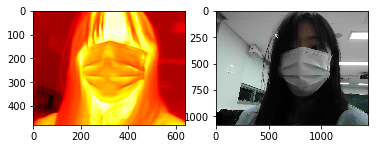

In [4]:
import flir_image_extractor
from glob import glob
import matplotlib.pyplot as plt

fir = flir_image_extractor.FlirImageExtractor()
fir.process_image('./thermal.JPG')
fir.plot()

In [3]:
proper_np=fir.get_thermal_np()
proper_np[0].shape

(640,)

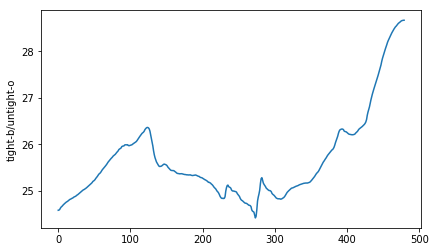

In [51]:
import matplotlib.pyplot as plt

li_tight=[]
li_untight=[]
for i in range(480):
    li_tight.append(sum(proper_np[i])/640)
plt.figure(figsize=[15,4])
plt.subplot(121)  
plt.plot(range(480),li_tight)
plt.ylabel('tight-b/untight-o')
plt.show()

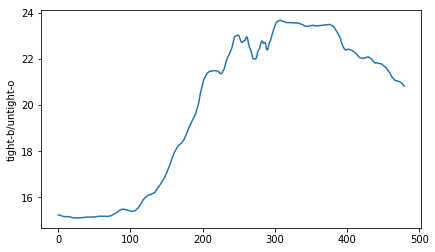

In [50]:
li_tight=[]
li_untight=[]
for i in range(480):
    li_tight.append(sum(proper_np[:,i])/640)
    
plt.figure(figsize=[15,4])
plt.subplot(121)  
plt.plot(range(480),li_tight)

plt.ylabel('tight-b/untight-o')
plt.show()

In [4]:
datapath="./resource"

### 0. Video to Img

In [5]:
import cv2 
import os 
import numpy as np

In [17]:
proper_path=datapath+"/proper/"
im_half_path=datapath+"/improper_half/"
im_untight_path=datapath+"/improper_untight/"

for path in [proper_path,im_half_path,im_untight_path]:
    for videopath in glob(path+"*.MP4"):
        print(videopath)
        cam = cv2.VideoCapture(videopath) 
        currentframe=0
        while(True):
            ret,frame=cam.read()
            if ret:
                name="."+videopath.strip(".MP4")+"_"+str(currentframe)+'.jpg'
                print("Creating:"+name)
                cv2.imwrite(name,frame)
                currentframe+=1
            else:
                break
cam.release()
cv2.destroyAllWindows()

./resource/proper/proper_02.MP4
Creating:./resource/proper/proper_02_0.jpg
Creating:./resource/proper/proper_02_1.jpg
Creating:./resource/proper/proper_02_2.jpg
Creating:./resource/proper/proper_02_3.jpg
Creating:./resource/proper/proper_02_4.jpg
Creating:./resource/proper/proper_02_5.jpg
Creating:./resource/proper/proper_02_6.jpg
Creating:./resource/proper/proper_02_7.jpg
Creating:./resource/proper/proper_02_8.jpg
Creating:./resource/proper/proper_02_9.jpg
Creating:./resource/proper/proper_02_10.jpg
Creating:./resource/proper/proper_02_11.jpg
Creating:./resource/proper/proper_02_12.jpg
Creating:./resource/proper/proper_02_13.jpg
Creating:./resource/proper/proper_02_14.jpg
Creating:./resource/proper/proper_02_15.jpg
Creating:./resource/proper/proper_02_16.jpg
Creating:./resource/proper/proper_02_17.jpg
Creating:./resource/proper/proper_02_18.jpg
Creating:./resource/proper/proper_02_19.jpg
Creating:./resource/proper/proper_02_20.jpg
Creating:./resource/proper/proper_02_21.jpg
Creating:.

### 1.Data Visualization
- numpy to plot

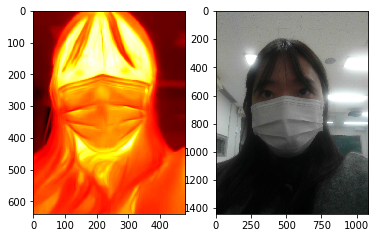

In [6]:
fir = flir_image_extractor.FlirImageExtractor()
fir.process_image('./resource/proper/proper_02.JPG')
fir.plot()

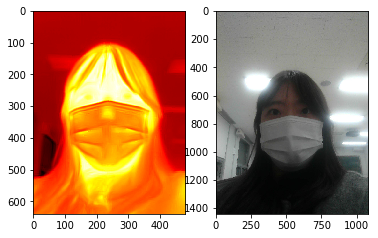

In [7]:
fir2 = flir_image_extractor.FlirImageExtractor()
fir2.process_image('./resource/improper_untight/improper_untight_02.JPG')
thermalnp_untight=fir2.get_thermal_np()
fir2.plot()

In [8]:
thermalnp=fir.get_thermal_np()

In [9]:
thermalnp.shape

(640, 480)

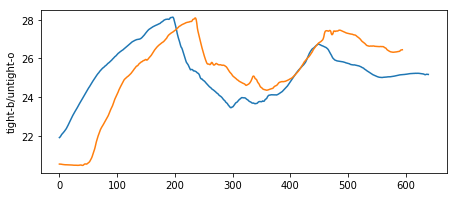

In [12]:
import matplotlib.pyplot as plt

li_tight=[]
li_untight=[]
for i in range(640):
    li_tight.append(sum(thermalnp[i])/480)
    li_untight.append(sum(thermalnp_untight[i]/480))
plt.figure(figsize=[16,3])
plt.subplot(121)  
plt.plot(range(640),li_tight)
plt.plot(range(595),li_untight[45:])
plt.ylabel('tight-b/untight-o')
plt.show()

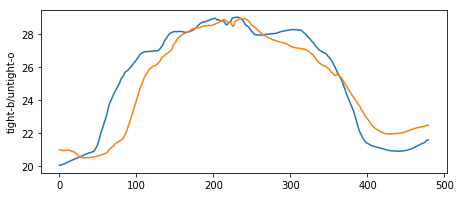

In [14]:
li_tight=[]
li_untight=[]
for i in range(480):
    li_tight.append(sum(thermalnp[:,i])/640)
    li_untight.append(sum(thermalnp_untight[:,i])/640)
plt.figure(figsize=[16,3])
plt.subplot(121)  
plt.plot(range(480),li_tight)
plt.plot(range(480),li_untight)
plt.ylabel('tight-b/untight-o')
plt.show()

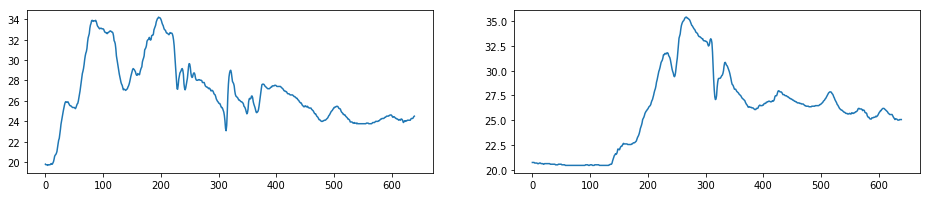

In [86]:
proper=[]
improper=[]
move=0
for i in range(640):
    proper.append(thermalnp[i][120])
    improper.append(thermalnp_untight[i][120])
plt.figure(figsize=[16,3])
plt.subplot(121)
plt.plot(range(640),proper)
plt.subplot(122)
plt.plot(range(640-move),improper[move:])

plt.show()

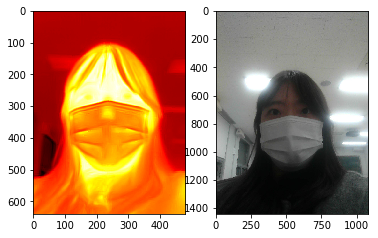

640 480


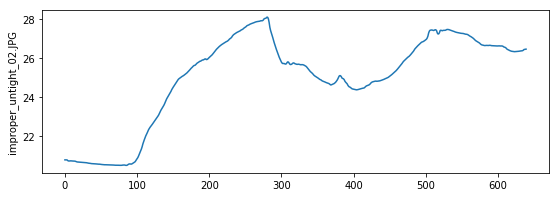

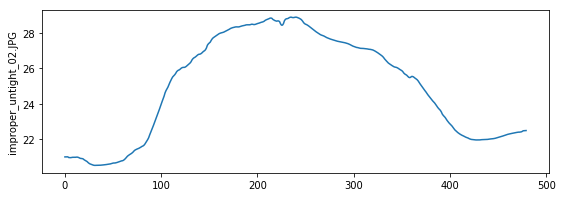

In [32]:
def v_plot(path):
    import matplotlib.pyplot as plt
    path=os.path.normpath(path)
    fir = flir_image_extractor.FlirImageExtractor()
    fir.process_image(path)
    fir.plot()
    li_tight=[]
    thermalnp=fir.get_thermal_np()
    w,h=thermalnp.shape
    print(w,h)
    for i in range(640):
        li_tight.append(sum(thermalnp[i])/480)
        #li_untight.append(sum(thermalnp_untight[i]/480))
    plt.figure(figsize=[20,3])
    plt.subplot(121)  
    plt.plot(range(640),li_tight)
    #plt.plot(range(595),li_untight[45:])
    plt.ylabel(path.rsplit("/")[-1])
    plt.show()
    
def h_plot(path):
    import matplotlib.pyplot as plt
    li_tight=[]
    path=os.path.normpath(path)
    fir = flir_image_extractor.FlirImageExtractor()
    fir.process_image(path)
    thermalnp=fir.get_thermal_np()
    for i in range(480):
        li_tight.append(sum(thermalnp[:,i])/640)
        #li_untight.append(sum(thermalnp_untight[:,i])/640)
    plt.figure(figsize=[20,3])
    plt.subplot(121)  
    plt.plot(range(480),li_tight)
    #plt.plot(range(480),li_untight)
    plt.ylabel(path.rsplit("/")[-1])
    plt.show()
v_plot('./resource/improper_untight/improper_untight_02.JPG')
h_plot('./resource/improper_untight/improper_untight_02.JPG')

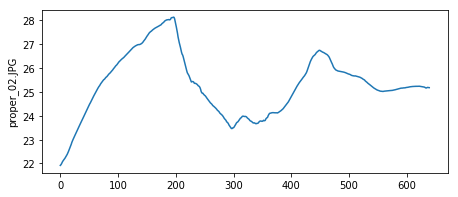

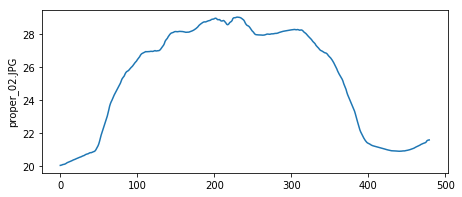

In [24]:
v_plot('./resource/proper/proper_02.JPG')
h_plot('./resource/proper/proper_02.JPG')

In [24]:
def v_plot(path):
    import matplotlib.pyplot as plt
    path=os.path.normpath(path)
    fir = flir_image_extractor.FlirImageExtractor()
    fir.process_image(path)
    fir.plot()
    li_tight=[]
    thermalnp=fir.get_thermal_np()
    w,h=thermalnp.shape
    for i in range(640):
        li_tight.append(sum(thermalnp[i])/480)
        #li_untight.append(sum(thermalnp_untight[i]/480))
    plt.figure(figsize=[20,3])
    plt.subplot(121)  
    plt.plot(range(640),li_tight)
    #plt.plot(range(595),li_untight[45:])
    plt.ylabel(path.rsplit("/")[-1])
    plt.show()
def h_plot(path):
    import matplotlib.pyplot as plt
    path=os.path.normpath(path)
    fir = flir_image_extractor.FlirImageExtractor()
    fir.process_image(path)
    #fir.plot()
    li_tight=[]
    thermalnp=fir.get_thermal_np()
    w,h=thermalnp.shape
    for i in range(480):
        li_tight.append(sum(thermalnp[:,i])/640)
        #li_untight.append(sum(thermalnp_untight[i]/480))
    plt.figure(figsize=[20,3])
    plt.subplot(122)  
    plt.plot(range(480),li_tight)
    #plt.plot(range(595),li_untight[45:])
    plt.ylabel(path.rsplit("/")[-1])
    plt.show()

In [14]:
np=fir.get_rgb_np()
np2=fir2.get_rgb_np()

from PIL import Image
def flir_toImg(fir):
    tmp=fir.get_rgb_np()
    img = Image.fromarray(tmp, 'RGB')
    img.save('./test.jpg')
    img.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [16]:
flir_toImg(fir)

In [10]:
import numpy as np
import cv2 as cv


# 얼굴과 눈을 검출하기 위해 미리 학습시켜 놓은 XML 포맷으로 저장된 분류기를 로드합니다. 
face_cascade = cv.CascadeClassifier('./opencv/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('./opencv/data/haarcascades/haarcascade_eye.xml')


In [11]:
face_cascade

<CascadeClassifier 0x7f9baef0ebf0>

In [17]:
# 얼굴과 눈을 검출할 그레이스케일 이미지를 준비해놓습니다. 
img = cv.imread("./test.jpg")

In [18]:
print(img)

[[[121 144 140]
  [119 142 138]
  [118 139 136]
  ...
  [148 146 145]
  [151 146 145]
  [151 146 145]]

 [[120 143 139]
  [118 141 137]
  [118 139 136]
  ...
  [148 146 145]
  [151 146 145]
  [151 146 145]]

 [[120 141 138]
  [119 140 137]
  [120 139 136]
  ...
  [148 146 145]
  [151 146 145]
  [151 146 145]]

 ...

 [[  6   6   6]
  [  6   6   6]
  [  6   6   6]
  ...
  [ 32  34  28]
  [ 31  33  27]
  [ 30  32  26]]

 [[  6   6   6]
  [  6   6   6]
  [  6   6   6]
  ...
  [ 32  34  28]
  [ 30  32  26]
  [ 29  31  25]]

 [[  6   6   6]
  [  6   6   6]
  [  6   6   6]
  ...
  [ 32  34  28]
  [ 30  32  26]
  [ 28  30  24]]]


In [19]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray

array([[140, 138, 136, ..., 146, 146, 146],
       [139, 137, 136, ..., 146, 146, 146],
       [138, 137, 136, ..., 146, 146, 146],
       ...,
       [  6,   6,   6, ...,  32,  31,  30],
       [  6,   6,   6, ...,  32,  30,  29],
       [  6,   6,   6, ...,  32,  30,  28]], dtype=uint8)

In [20]:
print(img.shape)
print(gray.shape)

(1440, 1080, 3)
(1440, 1080)


In [21]:
# 이미지에서 얼굴을 검출합니다. 
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

()

In [22]:
(x,y,w,h)=faces[0]

    # 원본 이미지에 얼굴의 위치를 표시합니다. 
cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
roi_gray = gray[y:y+h, x:x+w]
roi_color = img[y:y+h, x:x+w]

    # 눈을 검출합니다. 
eyes = eye_cascade.detectMultiScale(roi_gray)

IndexError: tuple index out of range

In [9]:
eyes

array([[227, 260,  25,  25],
       [219, 248,  42,  42],
       [191,  67,  96,  96],
       [ 47,  90,  76,  76]], dtype=int32)

In [8]:
for (ex,ey,ew,eh) in eyes:
        # 원본 이미지에 얼굴의 위치를 표시합니다. ROI에 표시하면 원본 이미지에도 표시됩니다. 
    cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


In [ ]:
# 얼굴이 검출되었다면 얼굴 위치에 대한 좌표 정보를 리턴받습니다. 
for (x,y,w,h) in faces:

    # 원본 이미지에 얼굴의 위치를 표시합니다. 
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    # 눈 검출은 얼굴이 검출된 영역 내부에서만 진행하기 위해 ROI를 생성합니다. 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # 눈을 검출합니다. 
    eyes = eye_cascade.detectMultiScale(roi_gray)

    # 눈이 검출되었다면 눈 위치에 대한 좌표 정보를 리턴받습니다. 
    for (ex,ey,ew,eh) in eyes:
        # 원본 이미지에 얼굴의 위치를 표시합니다. ROI에 표시하면 원본 이미지에도 표시됩니다. 
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


# 얼굴과 눈 검출 결과를 화면에 보여줍니다.
cv.imshow('img',img)
cv.waitKey(0)

cv.destroyAllWindows()

In [54]:
from __future__ import print_function

import numpy as np
import cv2 as cv

# local modules
from video import create_capture
from common import clock, draw_str


def detect(img, cascade):
    rects = cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=4, minSize=(30, 30),
                                     flags=cv.CASCADE_SCALE_IMAGE)
    if len(rects) == 0:
        return []
    rects[:,2:] += rects[:,:2]
    return rects

def draw_rects(img, rects, color):
    for x1, y1, x2, y2 in rects:
        cv.rectangle(img, (x1, y1), (x2, y2), color, 2)

def main():
    import sys, getopt

    args, video_src = getopt.getopt(sys.argv[1:], '', ['cascade=', 'nested-cascade='])
    try:
        video_src = video_src[0]
    except:
        video_src = 0
    args = dict(args)
    cascade_fn = args.get('--cascade', "data/haarcascades/haarcascade_frontalface_alt.xml")
    nested_fn  = args.get('--nested-cascade', "data/haarcascades/haarcascade_eye.xml")

    cascade = cv.CascadeClassifier(cv.samples.findFile(cascade_fn))
    nested = cv.CascadeClassifier(cv.samples.findFile(nested_fn))

    cam = create_capture(video_src, fallback='synth:bg={}:noise=0.05'.format(cv.samples.findFile('samples/data/lena.jpg')))

    while True:
        _ret, img = cam.read()
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        gray = cv.equalizeHist(gray)

        t = clock()
        rects = detect(gray, cascade)
        vis = img.copy()
        draw_rects(vis, rects, (0, 255, 0))
        if not nested.empty():
            for x1, y1, x2, y2 in rects:
                roi = gray[y1:y2, x1:x2]
                vis_roi = vis[y1:y2, x1:x2]
                subrects = detect(roi.copy(), nested)
                draw_rects(vis_roi, subrects, (255, 0, 0))
        dt = clock() - t

        draw_str(vis, (20, 20), 'time: %.1f ms' % (dt*1000))
        cv.imshow('facedetect', vis)

        if cv.waitKey(5) == 27:
            break

    print('Done')



Cloning into 'opencv'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 285595 (delta 4), reused 5 (delta 1), pack-reused 285582
Receiving objects: 100% (285595/285595), 476.04 MiB | 20.31 MiB/s, done.
Resolving deltas: 100% (199477/199477), done.
Checking connectivity... done.


In [1]:
from mtcnn import MTCNN
import cv2
detector = MTCNN()
#Load a videopip TensorFlow
frame=cv2.imread("./resource/nomask/nomask_01_1.jpg")
frame = cv2.resize(frame, (600, 400))
boxes = detector.detect_faces(frame)



Using TensorFlow backend.
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/t

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
if boxes:

    box = boxes[0]['box']
    conf = boxes[0]['confidence']
    x, y, w, h = box[0], box[1], box[2], box[3]

    if conf > 0.5:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 1)



In [ ]:
cv2.imshow("Frame", frame)

In [23]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

Using TensorFlow backend.
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/t

0.1.0


In [25]:
from mtcnn import MTCNN
model=MTCNN()

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = './test.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)

{'box': [254, 351, 472, 594], 'confidence': 0.8187142014503479, 'keypoints': {'nose': (545, 673), 'mouth_right': (636, 804), 'mouth_left': (438, 803), 'left_eye': (411, 560), 'right_eye': (645, 550)}}


In [27]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    pyplot.show()

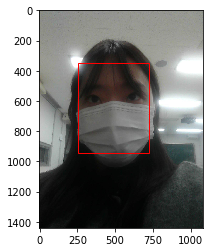

In [29]:
from matplotlib.patches import Rectangle
draw_image_with_boxes(filename, faces)

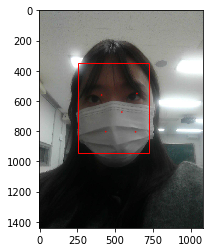

In [30]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    pyplot.show()

filename = './test.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

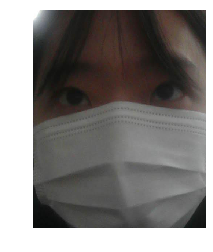

In [31]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw each face separately
def draw_faces(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
    # show the plot
    pyplot.show()

filename = './test.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

In [34]:
filename="./resource/improper_half/improper_half_03_0.JPG"
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

KeyboardInterrupt: 